## Taller 06 - Eliminación Gaussiana

Nombre: Carolay Pillajo

Fecha: 22/12/2025

### EJERCICIOS

* Resuelva el bug encontrado en el código

In [96]:
# -*- coding: utf-8 -*-
"""
Python 3
05 / 07 / 2024
@author: z_tjona

"I find that I don't understand things unless I try to program them."
-Donald E. Knuth
"""

# ----------------------------- logging --------------------------
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np


# ####################################################################
def eliminacion_gaussiana(A: np.ndarray | list[list[float | int]]) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana.

    ## Parameters

    `A`: matriz aumentada del sistema de ecuaciones lineales. Debe ser de tamaño n-by-(n+1), donde n es el número de incógnitas.

    ## Return

    `solucion`: vector con la solución del sistema de ecuaciones lineales.

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]

    for i in range(0, n - 1):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            raise ValueError("No existe solución única.")

        if p != i:
            # swap rows
            logging.debug(f"Intercambiando filas {i} y {p}")
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux

        # --- Eliminación: loop por fila
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

        print(f"\n{A}")
    # --- Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]

    for i in range(n - 2, -1, -1):
        suma = 0
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
        solucion[i] = (A[i, n] - suma) / A[i, i]

    return solucion

# ####################################################################
def descomposicion_LU(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Realiza la descomposición LU de una matriz cuadrada A.
    [IMPORTANTE] No se realiza pivoteo.

    ## Parameters

    ``A``: matriz cuadrada de tamaño n-by-n.

    ## Return

    ``L``: matriz triangular inferior.

    ``U``: matriz triangular superior. Se obtiene de la matriz ``A`` después de aplicar la eliminación gaussiana.
    """

    A = np.array(
        A, dtype=float
    )  # convertir en float, porque si no, puede convertir como entero

    assert A.shape[0] == A.shape[1], "La matriz A debe ser cuadrada."
    n = A.shape[0]

    L = np.zeros((n, n), dtype=float)

    for i in range(0, n):  # loop por columna

        # --- deterimnar pivote
        if A[i, i] == 0:
            raise ValueError("No existe solución única.")

        # --- Eliminación: loop por fila
        L[i, i] = 1
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]

            L[j, i] = m

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

    return L, A


# ####################################################################
def resolver_LU(L: np.ndarray, U: np.ndarray, b: np.ndarray) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante la descomposición LU.

    ## Parameters

    ``L``: matriz triangular inferior.

    ``U``: matriz triangular superior.

    ``b``: vector de términos independientes.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    n = L.shape[0]

    # --- Sustitución hacia adelante
    logging.info("Sustitución hacia adelante")

    y = np.zeros((n, 1), dtype=float)

    y[0] = b[0] / L[0, 0]

    for i in range(1, n):
        suma = 0
        for j in range(i):
            suma += L[i, j] * y[j]
        y[i] = (b[i] - suma) / L[i, i]

    logging.info(f"y = \n{y}")

    # --- Sustitución hacia atrás
    logging.info("Sustitución hacia atrás")
    sol = np.zeros((n, 1), dtype=float)

    sol[-1] = y[-1] / U[-1, -1]

    for i in range(n - 2, -1, -1):
        logging.info(f"i = {i}")
        suma = 0
        for j in range(i + 1, n):
            suma += U[i, j] * sol[j]
        logging.info(f"suma = {suma}")
        logging.info(f"U[i, i] = {U[i, i]}")
        logging.info(f"y[i] = {y[i]}")
        sol[i] = (y[i] - suma) / U[i, i]

    logging.debug(f"x = \n{sol}")
    return sol


# ####################################################################
def matriz_aumentada(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    """Construye la matriz aumentada de un sistema de ecuaciones lineales.

    ## Parameters

    ``A``: matriz de coeficientes.

    ``b``: vector de términos independientes.

    ## Return

    ``Ab``: matriz aumentada.

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    assert A.shape[0] == b.shape[0], "Las dimensiones de A y b no coinciden."
    return np.hstack((A, b.reshape(-1, 1)))


# ####################################################################
def separar_m_aumentada(Ab: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Separa la matriz aumentada en la matriz de coeficientes y el vector de términos independientes.

    ## Parameters
    ``Ab``: matriz aumentada.

    ## Return
    ``A``: matriz de coeficientes.
    ``b``: vector de términos independientes.
    """
    logging.debug(f"Ab = \n{Ab}")
    if not isinstance(Ab, np.ndarray):
        logging.debug("Convirtiendo Ab a numpy array")
        Ab = np.array(Ab, dtype=float)
    return Ab[:, :-1], Ab[:, -1].reshape(-1, 1)


[12-24 13:53:11][INFO] 2025-12-24 13:53:11.909103


In [97]:
Ab = [[4, 1, 2, 9], [2, 4, -1, -5], [1, 1, -3, -9]]

eliminacion_gaussiana(Ab)

[12-24 13:53:11][INFO] 
[[ 1.  1. -3. -9.]
 [ 0.  2.  5. 13.]
 [ 0. -3. 14. 45.]]
[12-24 13:53:11][INFO] 
[[ 1.   1.  -3.  -9. ]
 [ 0.   2.   5.  13. ]
 [ 0.   0.  21.5 64.5]]


array([ 1., -1.,  3.])

* Implemente el conteo de sumas y restas para ambos métodos

In [98]:
# -*- coding: utf-8 -*-
"""
Python 3
05 / 07 / 2024
@author: z_tjona

"I find that I don't understand things unless I try to program them."
-Donald E. Knuth
"""

# ----------------------------- logging --------------------------
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np


# ####################################################################
def eliminacion_gaussiana(A: np.ndarray | list[list[float | int]]) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana.

    ## Parameters

    `A`: matriz aumentada del sistema de ecuaciones lineales. Debe ser de tamaño n-by-(n+1), donde n es el número de incógnitas.

    ## Return

    `solucion`: vector con la solución del sistema de ecuaciones lineales.

    """

    # ---- contadores ----
    sumas = 0
    restas = 0

    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]

    for i in range(0, n - 1):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            raise ValueError("No existe solución única.")

        if p != i:
            # swap rows
            logging.debug(f"Intercambiando filas {i} y {p}")
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux

        # --- Eliminación: loop por fila
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]

            # ahora NO usamos vectorización para poder contar operaciones
            for k in range(i, n + 1):
                prod = m * A[i, k]
                A[j, k] = A[j, k] - prod
                restas += 1     # cuenta la resta

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

    # --- Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]

    for i in range(n - 2, -1, -1):
        suma = 0
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
            sumas += 1      # cuenta la suma

        solucion[i] = (A[i, n] - suma) / A[i, i]
        restas += 1         # cuenta (b - suma)

    logging.info(f"\nSumas = {sumas}, Restas = {restas}")
    return solucion


# ####################################################################
def descomposicion_LU(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Realiza la descomposición LU de una matriz cuadrada A.
    [IMPORTANTE] No se realiza pivoteo.

    ## Parameters

    ``A``: matriz cuadrada de tamaño n-by-n.

    ## Return

    ``L``: matriz triangular inferior.

    ``U``: matriz triangular superior. Se obtiene de la matriz ``A`` después de aplicar la eliminación gaussiana.
    """

    A = np.array(
        A, dtype=float
    )  # convertir en float, porque si no, puede convertir como entero

    assert A.shape[0] == A.shape[1], "La matriz A debe ser cuadrada."
    n = A.shape[0]

    L = np.zeros((n, n), dtype=float)

    # ---- contadores ----
    sumas = 0
    restas = 0

    for i in range(0, n):  # loop por columna

        # --- deterimnar pivote
        if A[i, i] == 0:
            raise ValueError("No existe solución única.")

        # --- Eliminación: loop por fila
        L[i, i] = 1
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]

            for k in range(i, n):
                prod = m * A[i, k]
                A[j, k] = A[j, k] - prod
                restas += 1   # resta

            L[j, i] = m

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

    logging.info(f"Sumas = {sumas}, Restas = {restas}")

    return L, A


# ####################################################################
def resolver_LU(L: np.ndarray, U: np.ndarray, b: np.ndarray) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante la descomposición LU.

    ## Parameters

    ``L``: matriz triangular inferior.

    ``U``: matriz triangular superior.

    ``b``: vector de términos independientes.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    n = L.shape[0]

    # ---- contadores ----
    sumas = 0
    restas = 0

    # --- Sustitución hacia adelante
    logging.info("Sustitución hacia adelante")

    y = np.zeros((n, 1), dtype=float)

    y[0] = b[0] / L[0, 0]

    for i in range(1, n):
        suma = 0
        for j in range(i):
            suma += L[i, j] * y[j]
            sumas += 1
        y[i] = (b[i] - suma) / L[i, i]
        restas += 1

    logging.info(f"y = \n{y}")

    # --- Sustitución hacia atrás
    logging.info("Sustitución hacia atrás")
    sol = np.zeros((n, 1), dtype=float)

    sol[-1] = y[-1] / U[-1, -1]

    for i in range(n - 2, -1, -1):
        logging.info(f"i = {i}")
        suma = 0
        for j in range(i + 1, n):
            suma += U[i, j] * sol[j]
            sumas += 1
        logging.info(f"\nsuma = {suma}")
        logging.info(f"U[i, i] = {U[i, i]}")
        logging.info(f"y[i] = {y[i]}")
        sol[i] = (y[i] - suma) / U[i, i]
        restas += 1

    logging.info(f"\nSumas = {sumas}, Restas = {restas}")
    logging.debug(f"x = \n{sol}")
    return sol


# ####################################################################
def matriz_aumentada(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    """Construye la matriz aumentada de un sistema de ecuaciones lineales.

    ## Parameters

    ``A``: matriz de coeficientes.

    ``b``: vector de términos independientes.

    ## Return

    ``Ab``: matriz aumentada.

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    assert A.shape[0] == b.shape[0], "Las dimensiones de A y b no coinciden."
    return np.hstack((A, b.reshape(-1, 1)))


# ####################################################################
def separar_m_aumentada(Ab: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Separa la matriz aumentada en la matriz de coeficientes y el vector de términos independientes.

    ## Parameters
    ``Ab``: matriz aumentada.

    ## Return
    ``A``: matriz de coeficientes.
    ``b``: vector de términos independientes.
    """
    logging.debug(f"Ab = \n{Ab}")
    if not isinstance(Ab, np.ndarray):
        logging.debug("Convirtiendo Ab a numpy array")
        Ab = np.array(Ab, dtype=float)
    return Ab[:, :-1], Ab[:, -1].reshape(-1, 1)


[12-24 13:53:12][INFO] 2025-12-24 13:53:12.004626


In [99]:
Ab = [[4, 1, 2, 9], [2, 4, -1, -5], [1, 1, -3, -9]]

eliminacion_gaussiana(Ab)

[12-24 13:53:12][INFO] 
[[ 1.  1. -3. -9.]
 [ 0.  2.  5. 13.]
 [ 0. -3. 14. 45.]]
[12-24 13:53:12][INFO] 
[[ 1.   1.  -3.  -9. ]
 [ 0.   2.   5.  13. ]
 [ 0.   0.  21.5 64.5]]
[12-24 13:53:12][INFO] 
Sumas = 3, Restas = 13


array([ 1., -1.,  3.])

* Compare la complejidad computacional del método de eliminación gaussiana vs Gauss-Jordan.

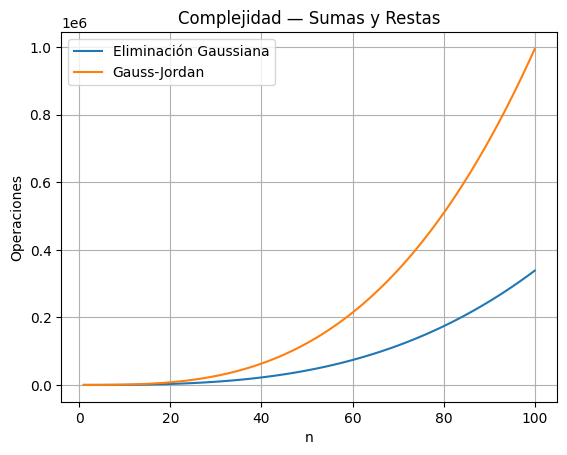

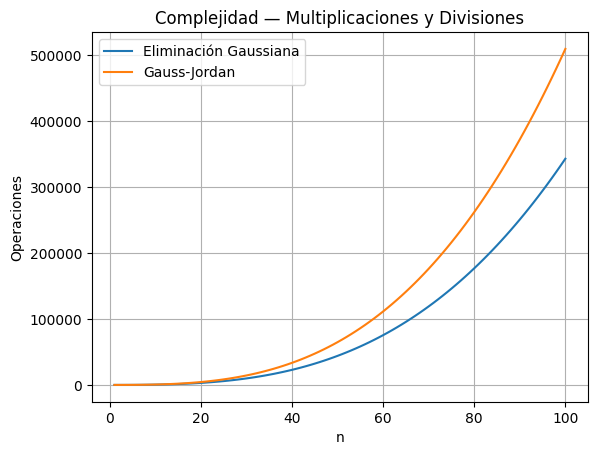

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de tamaños de problema
n = np.linspace(1, 100, 100)

# ----- Sumas - Restas -----
# Eliminación Gaussiana
gauss_add = (n**3)/3 + (n**2)/2 + (5*n)/6

# Gauss-Jordan
gj_add = (n**3) - (n**2)/2

# ----- Multiplicaciones - Divisiones -----
# Eliminación Gaussiana
gauss_mul = (n**3)/3 + (n**2) - (n)/3

# Gauss-Jordan
gj_mul = (n**3)/2 + (n**2) - (n)/2

# Gráfica Sumas - Restas
plt.figure()
plt.plot(n, gauss_add, label="Eliminación Gaussiana")
plt.plot(n, gj_add, label="Gauss-Jordan")
plt.title("Complejidad — Sumas y Restas")
plt.xlabel("n")
plt.ylabel("Operaciones")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica Multiplicaciones - Divisiones
plt.figure()
plt.plot(n, gauss_mul, label="Eliminación Gaussiana")
plt.plot(n, gj_mul, label="Gauss-Jordan")
plt.title("Complejidad — Multiplicaciones y Divisiones")
plt.xlabel("n")
plt.ylabel("Operaciones")
plt.legend()
plt.grid(True)
plt.show()


COMPARACIÓN: Gauss-Jordan requiere un mayor número de operaciones aritméticas que la Eliminación Gaussiana. En las gráficas, las funciones de Gauss-Jordan presentan coeficientes más grandes tanto en sumas/restas como en multiplicaciones/divisiones. En consecuencia, Gauss-Jordan resulta menos eficiente computacionalmente.

* Determine el número de intercambios de filas usando el código base

In [ ]:
def eliminacion_gaussiana(A: np.ndarray | list[list[float | int]]) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana.

    ## Parameters

    `A`: matriz aumentada del sistema de ecuaciones lineales. Debe ser de tamaño n-by-(n+1), donde n es el número de incógnitas.

    ## Return

    `solucion`: vector con la solución del sistema de ecuaciones lineales.

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]

    intercambios = 0  

    for i in range(0, n - 1):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            raise ValueError("No existe solución única.")

        if p != i:
            # swap rows
            logging.debug(f"Intercambiando filas {i} y {p}")
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux
            intercambios += 1     # 🔹 sumamos 1

        # --- Eliminación: loop por fila
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

    # --- Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]

    for i in range(n - 2, -1, -1):
        suma = 0
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
        solucion[i] = (A[i, n] - suma) / A[i, i]

    print(f"\nIntercambios de filas = {intercambios}\n")   # 🔹 mostramos el total

    return solucion

In [102]:
Ab = [[4, 1, 2, 9], [2, 4, -1, -5], [1, 1, -3, -9]]

eliminacion_gaussiana(Ab)

[12-24 13:53:12][INFO] 
[[ 1.  1. -3. -9.]
 [ 0.  2.  5. 13.]
 [ 0. -3. 14. 45.]]
[12-24 13:53:12][INFO] 
[[ 1.   1.  -3.  -9. ]
 [ 0.   2.   5.  13. ]
 [ 0.   0.  21.5 64.5]]

Intercambios de filas = 1



array([ 1., -1.,  3.])

* Determine el número de mult/div y sumas/restas usando el código base, cree varios sistemas de ecuaciones y compruebe con la expresión analítica de la complejidad del método.

In [103]:
mult_div = 0        # contador de multiplicaciones y divisiones
sum_res = 0         # contador de sumas y restas

def eliminacion_gaussiana(A: np.ndarray | list[list[float | int]]) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana.

    ## Parameters

    `A`: matriz aumentada del sistema de ecuaciones lineales. Debe ser de tamaño n-by-(n+1), donde n es el número de incógnitas.

    ## Return

    `solucion`: vector con la solución del sistema de ecuaciones lineales.

    """
    global mult_div, sum_res
    mult_div = 0
    sum_res = 0

    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]

    for i in range(0, n - 1):  # loop por columna

        p = None
        for pi in range(i, n):
            if A[pi, i] == 0:
                continue
            if p is None:
                p = pi
                continue
            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            raise ValueError("No existe solución única.")

        if p != i:
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux

        for j in range(i + 1, n):

            # m = A[j,i] / A[i,i]
            mult_div += 1
            m = A[j, i] / A[i, i]

            # columnas desde i hasta el FINAL de la MATRIZ AUMENTADA
            cols = (n + 1) - i

            # m * A[i, i:]
            mult_div += cols

            # A[j, i:] - ...
            sum_res += cols

            A[j, i:] = A[j, i:] - m * A[i, i:]

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

    solucion = np.zeros(n)

    mult_div += 1
    solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]

    for i in range(n - 2, -1, -1):

        suma = 0
        for j in range(i + 1, n):
            mult_div += 1
            sum_res += 1
            suma += A[i, j] * solucion[j]

        sum_res += 1
        mult_div += 1
        solucion[i] = (A[i, n] - suma) / A[i, i]

    print("\n--- CANTIDAD DE OPERACIONES ---")
    print("\nMultiplicaciones - Divisiones =", mult_div)
    print("Sumas - Restas =", sum_res)

    return solucion


In [104]:
Ab = [[4, 1, 2, 9], [2, 4, -1, -5], [1, 1, -3, -9]]

eliminacion_gaussiana(Ab)

[12-24 13:53:12][INFO] 
[[ 1.  1. -3. -9.]
 [ 0.  2.  5. 13.]
 [ 0. -3. 14. 45.]]
[12-24 13:53:12][INFO] 
[[ 1.   1.  -3.  -9. ]
 [ 0.   2.   5.  13. ]
 [ 0.   0.  21.5 64.5]]

--- CANTIDAD DE OPERACIONES ---

Multiplicaciones - Divisiones = 20
Sumas - Restas = 16


array([ 1., -1.,  3.])

In [ ]:
Ab = [[2, 1, -1, 8], [-3,-1,  2,-11], [-2, 1,  2, -3]
]

x = eliminacion_gaussiana(Ab)
print(x)


[12-24 13:53:12][INFO] 
[[ 2.   1.  -1.   8. ]
 [ 0.   0.5  0.5  1. ]
 [ 0.   2.   1.   5. ]]
[12-24 13:53:12][INFO] 
[[ 2.   1.  -1.   8. ]
 [ 0.   0.5  0.5  1. ]
 [ 0.   0.  -1.   1. ]]

--- CANTIDAD DE OPERACIONES ---

Multiplicaciones - Divisiones = 20
Sumas - Restas = 16
[ 2.  3. -1.]


In [106]:
Ab = [[3, -2,  4, 10], [2,  1, -1,  3], [1,  3,  2, 13]]

x = eliminacion_gaussiana(Ab)
print("\nSolución =", x)

[12-24 13:55:05][INFO] 
[[  1.   3.   2.  13.]
 [  0.  -5.  -5. -23.]
 [  0. -11.  -2. -29.]]
[12-24 13:55:05][INFO] 
[[  1.    3.    2.   13. ]
 [  0.   -5.   -5.  -23. ]
 [  0.    0.    9.   21.6]]

--- CANTIDAD DE OPERACIONES ---

Multiplicaciones - Divisiones = 20
Sumas - Restas = 16

Solución = [1.6 2.2 2.4]
